In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [10]:
from sklearn.datasets import fetch_lfw_people


faces = fetch_lfw_people(min_faces_per_person=60)


In [11]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


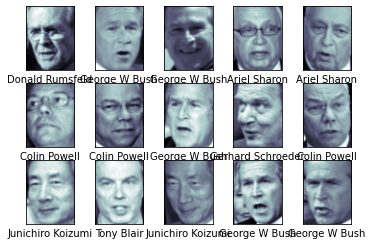

In [15]:
fix,ax = plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[] , xlabel = faces.target_names[faces.target[i]])
    

In [16]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [17]:
pca = PCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca , svc)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size= 0.2, random_state = 42)

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C':[1,5,10,50], 'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]} 

grid = GridSearchCV(model, param_grid, cv = 5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.005}


In [22]:
model = grid.best_estimator_
yfit = model.predict(X_test)

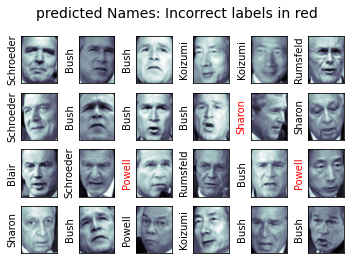

In [26]:
fig, ax = plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62 , 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i]==y_test[i] else 'red')
    
    fig.suptitle('predicted Names: Incorrect labels in red', size = 14);

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.67      0.70        12
     Colin Powell       0.73      0.91      0.81        54
  Donald Rumsfeld       0.81      0.59      0.68        22
    George W Bush       0.92      0.92      0.92       107
Gerhard Schroeder       0.94      0.79      0.86        19
Junichiro Koizumi       1.00      0.76      0.87        17
       Tony Blair       0.89      0.96      0.92        25

         accuracy                           0.86       256
        macro avg       0.86      0.80      0.82       256
     weighted avg       0.87      0.86      0.86       256



Text(91.68, 0.5, 'Predicted label')

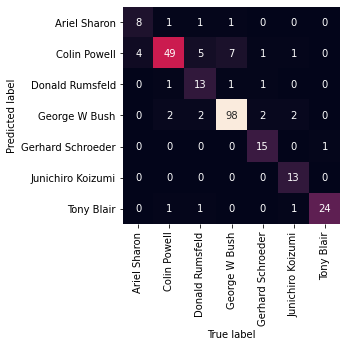

In [29]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot = True, fmt = 'd', cbar= False, xticklabels=faces.target_names, yticklabels = faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')